# Labeling and Visualizing Coins

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.measure import label
from skimage.color import label2rgb
import numpy as np

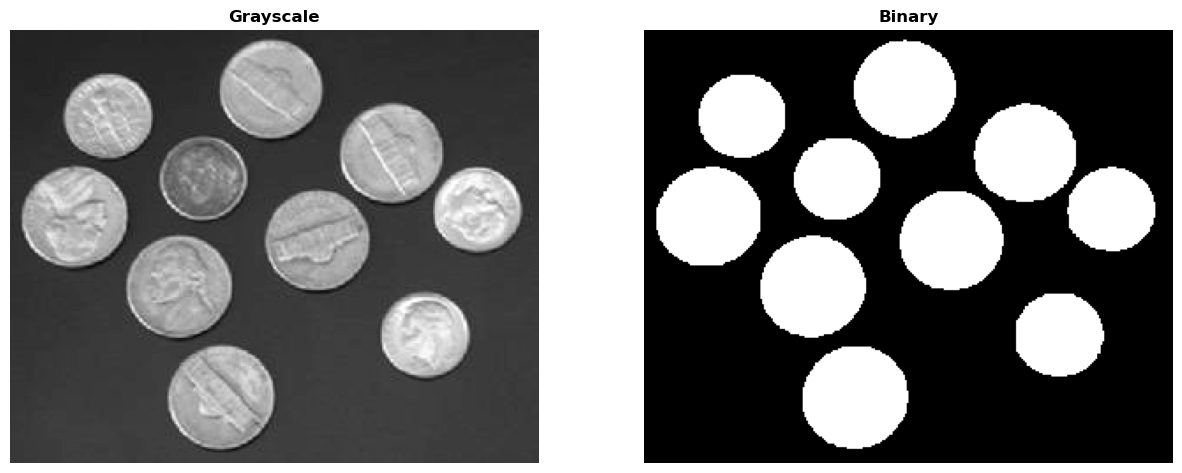

In [2]:
coins = cv2.imread("./images/coins.jpg", cv2.IMREAD_GRAYSCALE)
_, coins_binary = cv2.threshold(coins, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
coins_binary = ndimage.binary_fill_holes(coins_binary)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(coins, cmap='gray')
axs[0].set_title('Grayscale')
axs[0].axis('off')
axs[1].imshow(coins_binary, cmap='gray')
axs[1].set_title('Binary')
axs[1].axis('off')
plt.show()

In [3]:
coins_labels, number_coins = label(coins_binary, return_num=True)
print("Number of coins:", number_coins)

Number of coins: 10


We obtain a label matrix using the [label()](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) function that assigns a different label to each connected component. The background pixels are all 0. All of the pixels in a connected component are identified with a label.

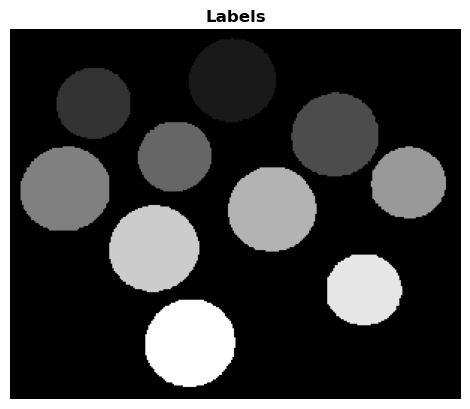

In [4]:
plt.imshow(coins_labels, cmap='gray')
plt.title("Labels")
plt.axis('off')
plt.show()

We can assign the components a color with [label2rgb()](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.label2rgb).

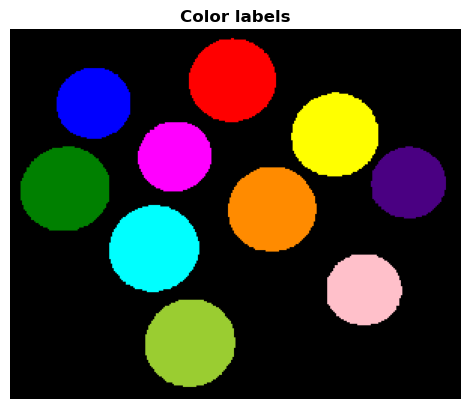

In [5]:
coins_rgb = label2rgb(coins_labels)

plt.imshow(coins_rgb)
plt.axis('off')
plt.title('Color labels')
plt.show()